# Fake News Detected

1. [Heuristic Data Analysis:](#1)
    1. [Visualization](#2)
1. [Data Preprocessing:](#3)
    1. [Cleaning Special Character](#4)
    1. [Tokenization](#5)
    1. [Lemmatize](#6)
    1. [Deleting Noise Data From Data Set](#7)
    1. [TFIDF VECTORİZER](#8)
1. [Train-Test Split ](#9)    
1. [Multinoimal Naive Bayes ](#10)    
1. [Logistic Regression ](#11)    
1. [Prediction Test ](#12)    
1. [Submit ](#13)    
   

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-news/train.csv
/kaggle/input/fake-news/submit.csv
/kaggle/input/fake-news/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/fake-news/train.csv")
test  = pd.read_csv ("/kaggle/input/fake-news/test.csv")
submit= pd.read_csv("/kaggle/input/fake-news/submit.csv")

train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


<a id="1"></a> <br>
# Heuristic Data Analysis - Keşifsel Veri Analizi


In [3]:
# Veri setlerimizin boyutları ; 
print(f"Train Shape : {train.shape}")
print(f"Test Shape : {test.shape}")
print(f"Submit Shape : {submit.shape}")

Train Shape : (20800, 5)
Test Shape : (5200, 4)
Submit Shape : (5200, 2)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [5]:
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
train.dtypes.value_counts()


object    3
int64     2
dtype: int64

<a id="2"></a> <br>
## Visualization - Görselleştirme

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


### Veri Seti İçerisindeki Haberlerin Dağılımları.
### Distribution of News in the Data Set.

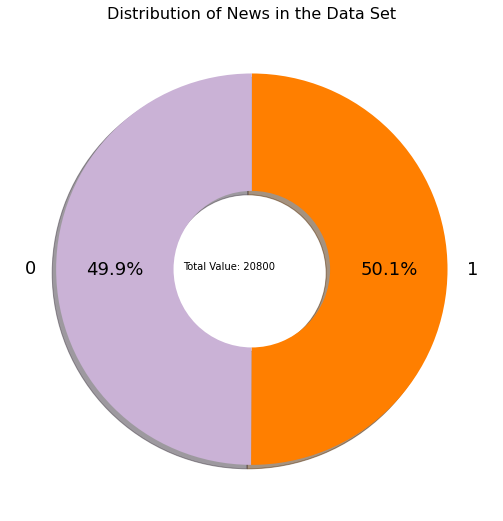

In [8]:
plt.figure(figsize = (9,9))
sorted_counts = train['label'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 18}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Total Value: {}'.format(train.shape[0]))
plt.title('Distribution of News in the Data Set', fontsize = 16);

<a id="3"></a> <br>
# Data Preprocessing - Veri Ön İşleme

In [9]:
#We are deleting data with null values.
#Boş değer taşıyan verileri silme işlemi gerçekleştiriyoruz.
train.dropna(inplace=True)

In [10]:
#After the deleted data, we rearrange the data set indexes.
# Silinen verilerden sonra veri seti indexlerini tekrar düzenliyoruz.
train.reset_index(inplace=True)

In [11]:
test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [12]:
test['text'].fillna('TEST',inplace=True)

In [13]:
test.text.isnull().sum()

0

In [14]:
import string 
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

<a id="4"></a> <br>

## Cleaning Special Character - Özel Karakterlerin Temizlenmesi

In [15]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [16]:
def ozel_karakter (text):
    punctation = string.punctuation
    return text.translate(str.maketrans("","",punctation))


train["text"] = train["text"].apply(lambda x: ozel_karakter(x))
train["text"] = train["text"].str.lower()
train["text"] = train["text"].str.split()
# Test veri setine uygulanması
test["text"] = test["text"].apply(lambda x: ozel_karakter(x))
test["text"] = test["text"].str.lower()
test["text"] = test["text"].str.split()

<a id="5"></a> <br>

## Tokenization - Tokenizasyon

In [17]:
def stop_words_temizle (text):
    words = set(stopwords.words("english"))
    return [i for i in text if i not in words]

train["text"] = train["text"].apply(lambda x : stop_words_temizle(x))
test["text"] = test["text"].apply(lambda x : stop_words_temizle(x))


<a id="6"></a> <br>

## Lemmatize

In [18]:
def lemmatizasyon (text):
    lemma = WordNetLemmatizer()
    return [lemma.lemmatize(word= i , pos="v") for i in text]

train["text"] = train["text"].apply(lambda x: lemmatizasyon(x))
test["text"] = test["text"].apply(lambda x: lemmatizasyon(x))

<a id="7"></a> <br>

## Deleting Noise Data From Data Set - Veri Setinden Gürültülerin Silinmesi


Basically, after performing all the necessary operations in text processing, noise occurs in our data set, so I delete words that are too short.


Temel olarak metin işlemede gerekli bütün işlemleri gerçekleştirdikten sonra veri setimizde gürültü oluşur , bu yüzden çok kısa olan kelimeleri siliyorum.

![](http://)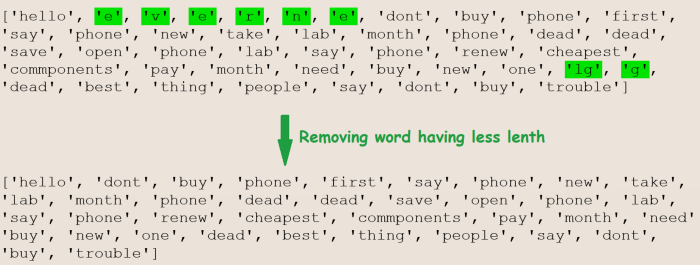

In [19]:
def gurultu_sil (text):
    return (' '.join([w for w in text if len(w)>2]))

train["text"] = train["text"].apply(lambda x : gurultu_sil(x))
test["text"] = test["text"].apply(lambda x : gurultu_sil(x))

<a id="8"></a> <br>

# TFIDF VECTORİZER

In [20]:

from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
# Apply to Train Data
#  Eğitim Verisine Uygulanması
tfidf_v=TfidfVectorizer(max_features=5200,ngram_range=(1,3))

X= tfidf_v.fit_transform(train["text"]).toarray()

In [22]:
# Apply to Test Data 
# Test Verisine Uygulanması
X_test_data = tfidf_v.fit_transform(test["text"]).toarray()
count_df_test = pd.DataFrame(X_test_data, columns=tfidf_v.get_feature_names())
count_df_test.head()


,000,000 people,100,100 000,1000,125,150,1960s,1968,1970,...,youtube,zero,zika,zone,zuckerberg,для,как,сша,что,это
0,0.105249,0.0,0.0,0.0,0.0,0.0,0.028852,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
y = train["label"]
train.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,house dem aide didn’t even see comey’s letter ...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,ever get feel life circle roundabout rather he...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,truth might get fire october 2016 tension inte...,1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,videos civilians kill single airstrike identif...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,print iranian woman sentence six years prison ...,1


In [24]:
vectorize_data = pd.DataFrame(X , columns =tfidf_v.get_feature_names())

In [25]:
vectorize_data.head()

,000,000 people,100,100 000,1000,125,150,1960s,1968,1970,...,youtube,zero,zika,zone,zuckerberg,для,как,сша,что,это
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065383,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id="9"></a> <br>

# Train-Test Split 

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vectorize_data, y, test_size=0.2, random_state=0)

In [27]:
X_train.head()

,000,000 people,100,100 000,1000,125,150,1960s,1968,1970,...,youtube,zero,zika,zone,zuckerberg,для,как,сша,что,это
8843,0.0,0.0,0.0,0.0,0.0,0.096281,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
6080,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
11437,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.043856,0.0,0.0,0.0
4367,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
9751,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [28]:
y_train.head()

8843     1
6080     1
11437    1
4367     1
9751     1
Name: label, dtype: int64

<a id="10"></a> <br>

# Multinomial Naive-Bayes

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import itertools

classifier=MultinomialNB()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % score)

accuracy:   0.890


<a id="11"></a> <br>

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

LR.fit(X_train, y_train)
pred_LR = LR.predict(X_test)

score_LR = metrics.accuracy_score(y_test, pred_LR)
print("accuracy:   %0.3f" % score_LR)

accuracy:   0.949


<a id="12"></a> <br>

## Prediction Test 

In [31]:
prediction_test = LR.predict(count_df_test)


In [32]:
prediction_test

array([0, 1, 1, ..., 0, 1, 1])

<a id="13"></a> <br>

# SUBMİT

In [33]:
submit.head()


,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1


In [34]:
submit['label']=prediction_test

In [35]:
submit.to_csv('submission_first.csv', index=False)
from IPython.display import FileLink
FileLink(r'submission_first.csv')


/kaggle/working/submission_first.csv

In [36]:
pred_test_nb = classifier.predict(count_df_test)


In [37]:
submit['label']=pred_test_nb


In [38]:
submit.head()


,id,label
0,20800,0
1,20801,0
2,20802,1
3,20803,0
4,20804,0


In [39]:
submit.to_csv('submission_second.csv',index=False)
FileLink(r'submission_second.csv')

/kaggle/working/submission_second.csv